In [1]:
from src.utils import *
from src.postprocess import rmsSpacial

# Error analysis
Two type of erro analysis:
- Mean spacial error
- Amplitude and phase error

### Mean spacial error
 
$$Error = \dfrac{\int |p^{'}(x,t_{obs}) - p_a^{'}(x,t_{obs})|}{\int p_a^{'}(x,t_{obs})}$$

- Three windows of spacial error
- window 1: x = (-99.17, -32.3) - length = 66.87
- window 2: x = (-32.3, 33.93) - length = 66.23
- window 3: x = (33.93, 99.37) - length = 65.44


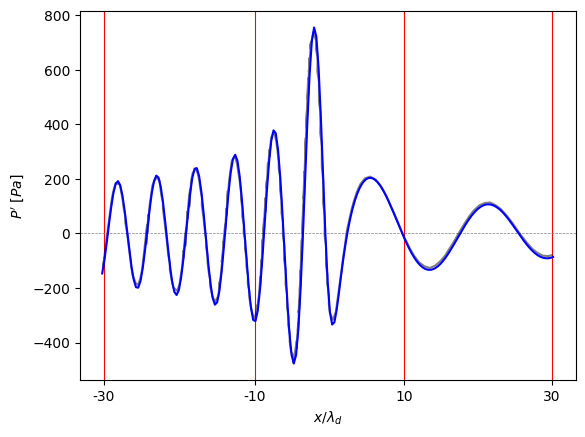

In [2]:
import json
from numpy import array
a =PATH_DATA.joinpath('monopoleFlow', 'analytical', 'monopole_M0.5.json')
with open(PATH_DATA.joinpath('monopoleFlow', 'analytical', 'monopole_M0.5.json'),'r') as file:
    data = json.load(file)
    nx = data['nx']
    xflow = linspace(data['xlim'][0], data['xlim'][1], nx)
    pflow = array(data['2']).T[list(xflow).index(0)]

min_id = xflow.tolist().index(-100)
max_id = xflow.tolist().index(100) +1
xflow = xflow[min_id:max_id]
pflow = pflow[min_id:max_id]

save = False
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
xa,pa = loadtxt(sol, unpack=True)
win = 3
window = (xa[-1]- xa[0])/win
pos = 0
ticks = [xa[0]]
for i in range(win):
    begin = pos
    pos   = xa.searchsorted(xa[0] + (i+1)*window)
    end   = pos 
    ticks.append(xa[end])

plt.axhline(0, color = 'gray', linestyle = '--', linewidth = 0.5)
plt.plot(xa,pa, 'k', alpha = 0.5)
plt.plot(xflow, pflow, 'blue')

plt.xlabel(r'$x/\lambda_d$')
plt.ylabel(r"$P' \ [Pa]$")


plt.xticks(ticks, ['-30','-10', '10', '30'])
plt.grid(axis='x', color = 'r')
if save:
    plt.savefig(PATH_IMAGES.joinpath('windows.png'), format = 'png', dpi = 720)
plt.show()

sol = a

# Time and Spacial schemes analysis
Time Schemes:
- Euler
- backward
- CrankNicolson

Spacial Schemes:   
- upwind 
- limitedLinear 
- linearUpwind

### CircMesh - Time and Spacial Schemes


In [3]:
psimT = importData(case='circMesh', test='timeTest', keyword='.dat')
psimS = importData(case = 'circMesh', test='spacialTest', keyword='.dat')
dic   = {'Time Schemes':psimT, 'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], xsim = (-100,100), windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')
    
plotSchemesGO(psimT, analitc=sol, xsim = (-100,100), title='CircMesh - Time Schemes', save=save)
plotSchemesGO(psimS, analitc=sol, xsim = (-100,100), title='CircMesh - Spacial Schemes', save=save, legend=2, windows=True)


-----Time Schemes-----
- p CrankNicolson: [4.233, 3.151, 1.224]%
- p Euler: [4.476, 3.132, 1.148]%
- p backward: [4.221, 3.152, 1.23]%
-----Spacial Schemes-----
- p upwind: [94.312, 30.091, 9.271]%
- p limitedLinear: [10.863, 3.632, 1.496]%
- p linearUpwind: [2.924, 2.622, 1.398]%


### QuadMesh - Spacial schemes

In [4]:
########################### 8 PPW ###########################
psimS = importData(case = 'quadMesh', test='spacialTest', keyword='8ppw')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}: 8PPW' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')

plotSchemesGO(psimS, analitc=sol, title='QuadMesh 8PPW', save=save, windows =True)

########################### 16 PPW ###########################

psimS = importData(case = 'quadMesh', test='spacialTest', keyword='16ppw')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}: 16PPW' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')

plotSchemesGO(psimS, analitc=sol, title='QuadMesh 16PPW', save=save, windows =True)

########################### 32 PPW ###########################

psimS = importData(case = 'quadMesh', test='spacialTest', keyword='32ppw')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}: 32PPW' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')

plotSchemesGO(psimS, analitc=sol, title='QuadMesh 32PPW', save=save, windows =True)

########################### 64 PPW ###########################

psimS = importData(case = 'quadMesh', test='spacialTest', keyword='64ppw')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}: 64PPW' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')

plotSchemesGO(psimS, analitc=sol, title='QuadMesh 64PPW', save=save, windows =True)

-----Spacial Schemes: 8PPW-----
- vanLeer 8ppw n4000: [71.348, 14.789, 1.803]%
- linearUpwind 8ppw n4000: [71.401, 14.709, 1.801]%
- limitedLinear 8ppw n4000: [71.374, 14.762, 1.805]%


-----Spacial Schemes: 16PPW-----
- limitedLinear 16ppw n4000: [9.951, 2.249, 1.522]%
- vanLeer 16ppw n4000: [9.951, 2.249, 1.514]%
- linearUpwind 16ppw n4000: [9.951, 2.249, 1.522]%


-----Spacial Schemes: 32PPW-----
- limitedLinear 32ppw n4000: [2.311, 1.278, 1.177]%
- vanLeer 32ppw n4000: [2.311, 1.278, 1.183]%
- linearUpwind 32ppw n4000: [2.311, 1.278, 1.177]%


-----Spacial Schemes: 64PPW-----
- limitedLinear 64ppw n4000: [1.44, 2.684, 2.838]%
- vanLeer 64ppw n4000: [1.45, 2.673, 2.914]%


### newMesh 1 - Spacial Schemes

In [5]:
########################### 8 PPW ###########################

psimS = importData(case = 'newMesh1', test='spacialTest', keyword='8ppw')
dic   = {'Time Schemes':psimT, 'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemesGO(psimS, analitc=sol, title='NewMesh1 8PPW', save=save, windows=True)

########################### 16 PPW ###########################

psimS = importData(case = 'newMesh1', test='spacialTest', keyword='16ppw_n4000')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemesGO(psimS, analitc=sol, title='NewMesh1 16PPW', save=save, windows=True)

########################### 32 PPW ###########################
psimS = importData(case = 'newMesh1', test='spacialTest', keyword='32ppw')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemesGO(psimS, analitc=sol, title='NewMesh1 32PPW', save=save, windows=True)

psimS = importData(case = 'newMesh1', test='spacialTest', subtest='dampingZone', keyword='32ppw')
dic   = {'Spacial Schemes':psimS}
print(psimS.keys())

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemesGO(psimS, xsim =(-260, 260), analitc=sol, title='NewMesh1 32PPW DampingZone', save=save, windows=True)


########################### 64 PPW ###########################

psimS = importData(case = 'newMesh1', test='spacialTest', keyword='64ppw')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemesGO(psimS, analitc=sol, title='NewMesh1 64PPW', save=save, windows=True)

-----Time Schemes-----
- p CrankNicolson: [55.545, 2.89, 12.379]%
- p Euler: [54.733, 2.872, 12.169]%
- p backward: [55.591, 2.891, 12.391]%
-----Spacial Schemes-----
- vanLeer 8ppw n4000: [73.032, 16.736, 1.072]%
- linearUpwind 8ppw n4000: [73.032, 16.736, 1.072]%
- limitedLinear 8ppw n4000: [73.032, 16.736, 1.072]%


-----Spacial Schemes-----
- limitedLinear 16ppw n4000: [10.072, 2.92, 1.66]%
- vanLeer 16ppw n4000: [10.072, 2.92, 1.661]%
- linearUpwind 16ppw n4000: [10.072, 2.92, 1.662]%


-----Spacial Schemes-----
- limitedLinear 32ppw n4000: [1.827, 1.489, 1.28]%
- vanLeer 32ppw n4000: [1.841, 1.489, 1.283]%
- linearUpwind 32ppw n4000: [1.843, 1.488, 1.284]%


dict_keys(['limitedLinear 32ppw n4000', 'vanLeer 32ppw n4000', 'linearUpwind 32ppw n4000'])
-----Spacial Schemes-----
- limitedLinear 32ppw n4000: [113.301, 155.159, 140.385]%
- vanLeer 32ppw n4000: [113.289, 155.097, 140.67]%
- linearUpwind 32ppw n4000: [113.292, 155.104, 140.689]%


-----Spacial Schemes-----
- limitedLinear 64ppw n4000: [1.471, 1.262, 2.209]%
- linearUpwind 64ppw n4000: [1.482, 1.267, 2.685]%
- vanLeer 64ppw n4000: [1.479, 1.265, 2.552]%


### newMesh1 - Time Schemes

In [8]:
########################### 32 PPW ###########################
psimS = importData(case = 'newMesh1', test='timeTest', keyword='32ppw')
dic   = {'Time Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemesGO(psimS, analitc=sol, title='NewMesh1 32PPW - Time Schemes', save=save, windows=True, legend=2)

########################### 64 PPW ###########################

psimS = importData(case = 'newMesh1', test='timeTest', keyword='64ppw')
dic   = {'Time Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemesGO(psimS, analitc=sol,title='NewMesh1 64PPW - Time Scheme', save=save, windows=True, legend = 3)

-----Time Schemes-----
- backward n1000 32ppw: [3.882, 7.603, 91.639]%
- backward n800 32ppw: [2.945, 19.555, 518.402]%
- Euler n1000 32ppw: [2.303, 1.546, 1.527]%
- CrankNicolson n800 32ppw: [3.063, 16.921, 705.262]%
- CrankNicolson n1000 32ppw: [3.412, 4.356, 116.778]%
- Euler n800 32ppw: [2.611, 1.562, 8.363]%


-----Spacial Schemes-----
- Euler n4000 64ppw: [1.201, 1.248, 0.886]%
- backward n4000 dz 64ppw: [1.479, 1.265, 2.552]%
- backward n4000 64ppw: [1.469, 1.262, 2.302]%
